In [1]:
!ls raw_data

'Active Wiretap'  'Mirai Botnet'  'SSL Renegotiation'
'ARP MitM'	  'OS Scan'	  'SYN DoS'
 Fuzzing	  'SSDP Flood'	  'Video Injection'


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

In [3]:
# Define the function to count labels in datasets (check how sqewed is the data)
def count_classes(folder_name):
    print(folder_name, "==>")
    # Set the path to the folder
    folder_path = os.path.join('./raw_data', folder_name)

    # Search for data and label files in the folder
    data_file_path = ''
    label_file_path = ''
    for file_name in os.listdir(folder_path):
        if file_name.endswith('_dataset.csv'):
            data_file_path = os.path.join(folder_path, file_name)
        elif file_name.endswith('_labels.csv'):
            label_file_path = os.path.join(folder_path, file_name)
  
    # Load the labels into pandas dataframes
    # header is 0-th row, index is 0-th col
    labels = pd.read_csv(label_file_path, header=0, index_col=0)
    label_column_name = 'x'
    
    # Count the records with 0 and 1 in the label column
    n_0 = labels[label_column_name].value_counts()[0]
    n_1 = labels[label_column_name].value_counts()[1]

    print("   benign :", n_0)
    print("   attack :", n_1)
    
    return int(n_0), int(n_1)

In [4]:
# skip mirai botnet, it does not have index column
folders = [
    'Active Wiretap',
    'ARP MitM',
    'Fuzzing',
    'OS Scan',
    'SSDP Flood',
    'SSL Renegotiation',
    'SYN DoS',
    'Video Injection',
]

count_map = dict()

for folder in folders:
    n_0, n_1 = count_classes(folder)
    count_map[folder] = (n_0, n_1)

Active Wiretap ==>
   benign : 1355473
   attack : 923216
ARP MitM ==>
   benign : 1358995
   attack : 1145272
Fuzzing ==>
   benign : 1811356
   attack : 432783
OS Scan ==>
   benign : 1632151
   attack : 65700
SSDP Flood ==>
   benign : 2637662
   attack : 1439604
SSL Renegotiation ==>
   benign : 2114919
   attack : 92652
SYN DoS ==>
   benign : 2764238
   attack : 7038
Video Injection ==>
   benign : 2369902
   attack : 102499


In [5]:
# Mirai Botnet dataset does not have and index and header column
def count_mirai(folder_name):
    print(folder_name, "==>")
    # Set the path to the folder
    folder_path = os.path.join('./raw_data', folder_name)

    # Search for data and label files in the folder
    data_file_path = ''
    label_file_path = ''
    for file_name in os.listdir(folder_path):
        if file_name.endswith('_dataset.csv'):
            data_file_path = os.path.join(folder_path, file_name)
        elif file_name.endswith('_labels.csv'):
            label_file_path = os.path.join(folder_path, file_name)
  
    # Load the labels into pandas dataframes
    # header is 0-th row, index is 0-th col
    labels = pd.read_csv(label_file_path, header=None)
    label_column_name = 'x'
    labels.columns = [label_column_name]
    
    # Count the records with 0 and 1 in the label column
    n_0 = labels[label_column_name].value_counts()[0]
    n_1 = labels[label_column_name].value_counts()[1]

    print("   benign :", n_0)
    print("   attack :", n_1)

    return int(n_0), int(n_1)

In [6]:
folder = 'Mirai Botnet'
n_0, n_1 = count_mirai(folder)
count_map[folder] = (n_0, n_1)

Mirai Botnet ==>
   benign : 121621
   attack : 642516


<Axes: >

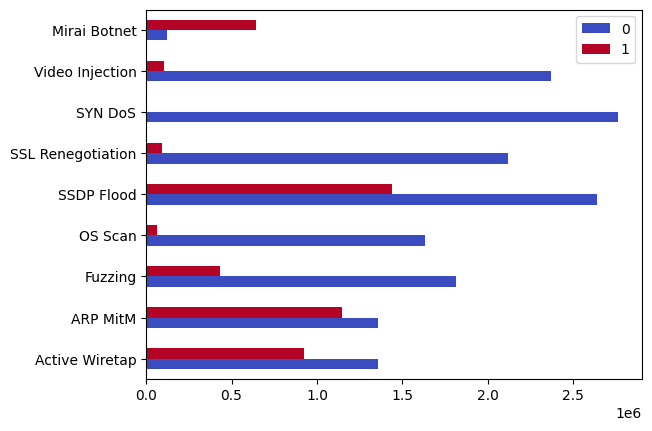

In [7]:
df = pd.DataFrame.from_dict(count_map, orient='index')
df.plot(kind='barh', colormap='coolwarm')

In [8]:
def base_check(folder_name):
    print(folder_name, "==>")
    # Set the path to the folder
    folder_path = os.path.join('./raw_data', folder_name)

    # Search for data and label files in the folder
    data_file_path = ''
    label_file_path = ''
    for file_name in os.listdir(folder_path):
        if file_name.endswith('_dataset.csv'):
            data_file_path = os.path.join(folder_path, file_name)
        elif file_name.endswith('_labels.csv'):
            label_file_path = os.path.join(folder_path, file_name)
        
    # Load data
    print("   Loading data...")
    data = pd.read_csv(data_file_path, header=None)

    print('   shape: ', data.shape)

    contains_nulls = False
    for val in data.isnull().sum():
        if val > 0:
            contains_nulls = True

    contains_nan = False
    for val in data.isna().sum():
        if val > 0:
            contains_nan = True

    if contains_nulls:
        print('   contains nulls')
    else:
        print('   does not contain nulls')

    if contains_nan:
        print('   contains NaN')
    else:
        print('   does not contain Nan')

    
    outliers_threshold = 3
    z_scores = np.abs(stats.zscore(data, nan_policy='omit'))
    mask = (z_scores <= outliers_threshold).all(axis=1)
    print(f"   Number of outlier rows = {len(mask[mask == False])} from (total) {data.shape[0]} rows")
    

    return data

In [9]:
df = base_check('Active Wiretap')

Active Wiretap ==>
   Loading data...
   shape:  (2278689, 115)
   does not contain nulls
   does not contain Nan
   Number of outlier rows = 358822 from (total) 2278689 rows


In [10]:
df = base_check('ARP MitM')

ARP MitM ==>
   Loading data...
   shape:  (2504267, 115)
   does not contain nulls
   does not contain Nan
   Number of outlier rows = 404306 from (total) 2504267 rows


In [11]:
df = base_check('Fuzzing')

Fuzzing ==>
   Loading data...
   shape:  (2244139, 115)
   does not contain nulls
   does not contain Nan
   Number of outlier rows = 578807 from (total) 2244139 rows


In [12]:
df = base_check('OS Scan')

OS Scan ==>
   Loading data...
   shape:  (1697851, 115)
   does not contain nulls
   does not contain Nan
   Number of outlier rows = 132706 from (total) 1697851 rows


In [13]:
#df = base_check('SSDP Flood')

In [14]:
df = base_check('SSL Renegotiation')

SSL Renegotiation ==>
   Loading data...
   shape:  (2207571, 115)
   does not contain nulls
   does not contain Nan
   Number of outlier rows = 136612 from (total) 2207571 rows


In [ ]:
df = base_check('SYN DoS')

SYN DoS ==>
   Loading data...
   shape:  (2771276, 115)
   does not contain nulls
   does not contain Nan


In [ ]:
df = base_check('Video Injection')

In [ ]:
df = base_check('Mirai Botner')